In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('project.csv', encoding= 'unicode_escape')

In [3]:
raw_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


# Exploratory Analysis

In [4]:
raw_data.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,NaN,25035,1430,1464,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,135,130,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN
std,14806.29199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN
25%,12823.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,38467.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN


In [5]:
raw_data.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
cleaned_data = raw_data.dropna(axis=1)
cleaned_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [7]:
data_1 = cleaned_data[['Ship Mode','Segment','City','State','Country','Market','Region','Category','Sub-Category','Product Name','Sales','Quantity','Discount','Profit','Shipping Cost','Order Priority']]
data_1

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Standard Class,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,Second Class,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,Second Class,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Standard Class,Corporate,Fairfield,California,United States,US,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,Standard Class,Consumer,Agadir,Souss-Massa-Draâ,Morocco,Africa,Africa,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,Second Class,Consumer,Managua,Managua,Nicaragua,LATAM,Central,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,Standard Class,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [8]:
data_1.describe(include='all')

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,4,3,3636,1094,147,7,13,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,Standard Class,Consumer,New York City,California,United States,APAC,Central,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,30775,26518,915,2001,9994,11002,11117,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN


In [9]:
x1 = data_1['Discount']
x2 = data_1['Profit']
x3 = data_1['Quantity']
x4 = data_1['Sales']

<function matplotlib.pyplot.show(*args, **kw)>

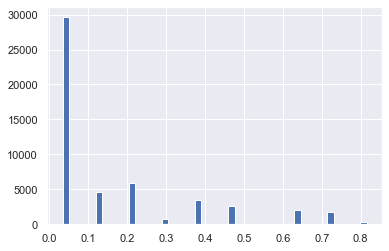

In [10]:
plt.hist(x1, rwidth= 0.2, label = 'Discount')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

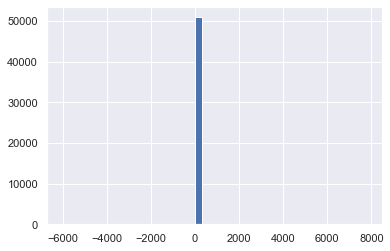

In [11]:
plt.hist(x2, rwidth= 0.2, label = 'Profit')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

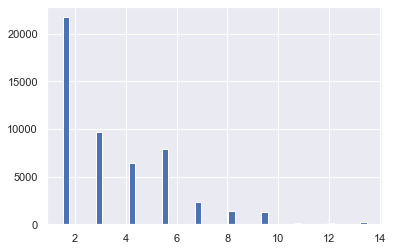

In [12]:
plt.hist(x3, rwidth= 0.2, label = 'Quantity')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

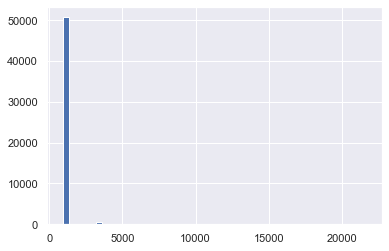

In [13]:
plt.hist(x4, rwidth= 0.2, label = 'Sales')
plt.show


# Data Transformation

In [14]:
numeric_var = data_1[['Sales','Quantity','Discount','Profit','Shipping Cost']]
numeric_var.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [15]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler
standardized_data = pd.DataFrame(std_scaler.fit_transform(numeric_var), columns = numeric_var.columns)
standardized_data

,Sales,Quantity,Discount,Profit,Shipping Cost
0,0.331875,-0.647964,-0.673210,0.444702,0.158546
1,-0.258685,-0.209126,-0.202129,0.042589,-0.290698
2,-0.369945,0.229712,-0.673210,0.005902,-0.317751
3,-0.413540,-0.209126,1.682194,-0.313561,-0.376219
4,-0.272419,0.668550,-0.202129,0.052536,-0.378313
...,...,...,...,...,...
51285,-0.477041,-0.647964,0.268952,-0.138191,-0.444810
51286,-0.497375,-1.086803,-0.673210,-0.161702,-0.451791
51287,-0.451412,-0.209126,-0.673210,-0.093215,-0.454234
51288,-0.490956,-1.086803,-0.673210,-0.160899,-0.456852


In [16]:
standardized_data.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04
mean,8.262276e-18,-3.159709e-16,-3.551502e-16,-4.558971e-17,1.929524e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-5.046482e-01,-1.086803e+00,-6.732098e-01,-3.802120e+01,-4.603428e-01
25%,-4.424721e-01,-6.479644e-01,-6.732098e-01,-1.641109e-01,-4.147901e-01
50%,-3.311128e-01,-2.091262e-01,-6.732098e-01,-1.111108e-01,-3.243828e-01
75%,9.358055e-03,6.685502e-01,2.689515e-01,4.702909e-02,-3.361329e-02
max,4.592658e+01,4.618094e+00,3.330976e+00,4.801767e+01,1.583340e+01


In [17]:
x5 = standardized_data['Discount']
x6 = standardized_data['Profit']
x7 = standardized_data['Quantity']
x8 = standardized_data['Sales']
x9 = standardized_data['Shipping Cost']

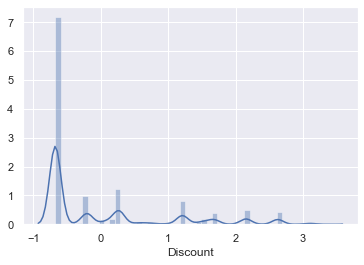

In [18]:
sns.distplot(x5)

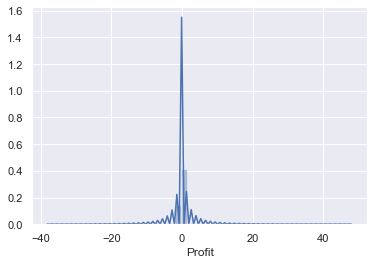

In [19]:
sns.distplot(x6)

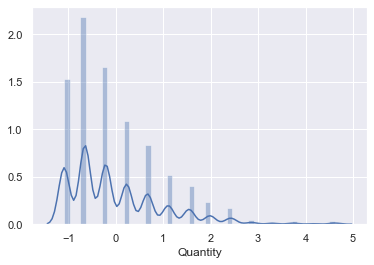

In [20]:
sns.distplot(x7)

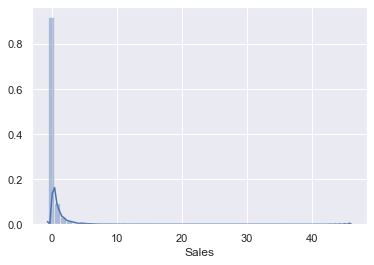

In [21]:
sns.distplot(x8)

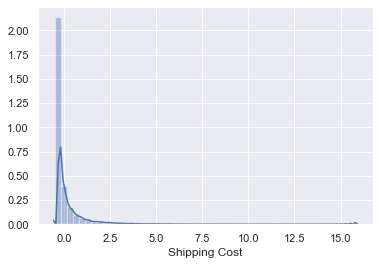

In [22]:
sns.distplot(x9)

In [23]:
log_sales = np.log(numeric_var['Sales'])


numeric_var['log_sales'] = log_sales


numeric_var

C:\Users\Kumar Suyash Rituraj\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Sales,Quantity,Discount,Profit,Shipping Cost,log_sales
0,408.300,2,0.0,106.1400,35.46,6.012002
1,120.366,3,0.1,36.0360,9.72,4.790537
2,66.120,4,0.0,29.6400,8.17,4.191471
3,44.865,3,0.5,-26.0550,4.82,3.803658
4,113.670,5,0.1,37.7700,4.70,4.733300
...,...,...,...,...,...,...
51285,13.904,2,0.2,4.5188,0.89,2.632177
51286,3.990,1,0.0,0.4200,0.49,1.383791
51287,26.400,3,0.0,12.3600,0.35,3.273364
51288,7.120,1,0.0,0.5600,0.20,1.962908


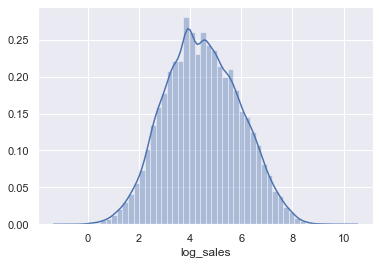

In [24]:
x10= numeric_var['log_sales']

sns.distplot(x10)


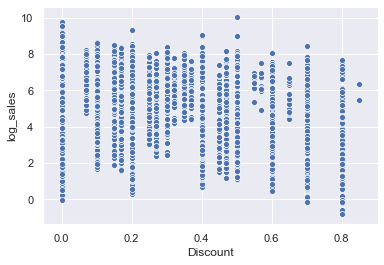

In [25]:
sns.scatterplot(x1, x10)

In [26]:
data_1

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Standard Class,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,Second Class,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,Second Class,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Standard Class,Corporate,Fairfield,California,United States,US,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,Standard Class,Consumer,Agadir,Souss-Massa-Draâ,Morocco,Africa,Africa,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,Second Class,Consumer,Managua,Managua,Nicaragua,LATAM,Central,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,Standard Class,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [27]:
data_1.describe(include = 'all')

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,4,3,3636,1094,147,7,13,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,Standard Class,Consumer,New York City,California,United States,APAC,Central,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,30775,26518,915,2001,9994,11002,11117,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN


In [28]:
data_1['Market'].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [29]:
data_1['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [30]:
data_1['Ship Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [31]:
data_1_mapped = data_1.copy()
data_1_mapped ['Market'] = data_1['Market'].map({'Africa':0,'APAC':1, 'EMEA':2, 'EU':3, 'US':4, 'LATAM':5, 'Canada':6 })
data_1_mapped ['Ship Mode'] = data_1['Ship Mode'].map({'Standard Class':0, 'Second Class':1, 'First Class':2, 'Same Day':3})
data_1_mapped


,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0,Consumer,Constantine,Constantine,Algeria,0,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,0,Consumer,Wagga Wagga,New South Wales,Australia,1,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,1,Consumer,Budapest,Budapest,Hungary,2,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,1,Home Office,Stockholm,Stockholm,Sweden,3,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,0,Consumer,Wagga Wagga,New South Wales,Australia,1,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,0,Corporate,Fairfield,California,United States,4,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,0,Consumer,Agadir,Souss-Massa-Draâ,Morocco,0,Africa,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,1,Consumer,Managua,Managua,Nicaragua,5,Central,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,0,Consumer,Juárez,Chihuahua,Mexico,5,North,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [32]:
profit_segment = pd.DataFrame([data_1_mapped['Market'], data_1_mapped['Ship Mode']]).T
profit_segment

,Market,Ship Mode
0,0,0
1,1,0
2,2,1
3,3,1
4,1,0
...,...,...
51285,4,0
51286,0,0
51287,5,1
51288,5,0


In [33]:
from sklearn.cluster import KMeans